In [1]:
import numpy as np
L = np.array([[7/20, 0, 0, 0, 1, 0],
    [4/25, 11/50, 0, 0, 0, 0],
    [0, 37/100, 457/1000, 0, 0, 0],
    [0, 0, 0, 389/1000, 2, 0],
    [0, 0, 0, 23/100, 151/611, 0],
    [0, 0, 0, 0, 2/5, 7/10]])


Evalues, Evectors = np.linalg.eig(L)
pos = np.argmax(np.abs(Evalues))
val = Evalues[pos]
vec = Evectors[:, pos]

print("Eigenvalues: \n", Evalues)
print("\nEigenvectors: \n", Evectors)
print("\nDominant Eigenvalue: \n", val)
print("Corresponding Eigenvector: \n", vec)


Eigenvalues: 
 [ 0.457       0.22        0.35        0.7        -0.36386416  1.        ]

Eigenvectors: 
 [[ 0.          0.          0.22017812  0.          0.4356766  -0.38455393]
 [ 0.          0.53937656  0.27098846  0.         -0.11939122 -0.07888286]
 [ 1.         -0.84206468 -0.93706289  0.          0.05381494 -0.05375075]
 [ 0.          0.          0.          0.          0.82621521 -0.81819985]
 [ 0.          0.          0.          0.         -0.31101391 -0.24996005]
 [ 0.          0.          0.          1.          0.11693745 -0.33328007]]

Dominant Eigenvalue: 
 1.0
Corresponding Eigenvector: 
 [-0.38455393 -0.07888286 -0.05375075 -0.81819985 -0.24996005 -0.33328007]


In [25]:
def ref_matrix(C):
    l = []
    m, n = np.shape(C) 
    i = 0
    j = 0
    while i < m and j < n:
        p = np.max(np.abs(C[i:m, j]))
        max_p = np.argmax(np.abs(C[i:m, j]))
        k = max_p + i
        if p == 0 or p <= 0.0000000000001:
            j = j + 1
        else:
            D = C.copy()
            D[k, :] = C[i, :]
            D[i, :] = C[k, :]
            C = D.copy()
            l.append(j)
            for x in range(0, m):
                if x != i:
                    factor= C[x,j] / C[i,j]
                    C[x, :] -= factor * C[i, :]
            i = i + 1
            j = j + 1
    return C

B = np.array([[0.20043],
             [0.04111],
             [0.02801],
             [0.42645],
             [0.13028],
             [0.17370]])
C = np.concatenate((L, B), axis=1)
print(" the Augmented Matrix is :\n",C)
print("\n The REF is : \n",ref_matrix(C))
D=ref_matrix(C)
X = np.zeros(n - 1)
for i in range(m - 1, -1, -1):
    X[i] = C[i, -1] - np.dot(C[i, i+1:n-1], X[i+1:n-1])
print("Solution vector X:")
print(X)

 the Augmented Matrix is :
 [[0.35       0.         0.         0.         1.         0.
  0.20043   ]
 [0.16       0.22       0.         0.         0.         0.
  0.04111   ]
 [0.         0.37       0.457      0.         0.         0.
  0.02801   ]
 [0.         0.         0.         0.389      2.         0.
  0.42645   ]
 [0.         0.         0.         0.23       0.24713584 0.
  0.13028   ]
 [0.         0.         0.         0.         0.4        0.7
  0.1737    ]]

 The REF is : 
 [[ 3.50000000e-01  0.00000000e+00  0.00000000e+00  2.96729389e-17
   0.00000000e+00  0.00000000e+00  7.01490172e-02]
 [ 0.00000000e+00  3.70000000e-01  0.00000000e+00 -2.28134803e-17
   0.00000000e+00  0.00000000e+00  1.52067946e-02]
 [ 0.00000000e+00  0.00000000e+00 -2.71729730e-01 -1.35647721e-17
   0.00000000e+00  0.00000000e+00 -7.61271674e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.89000000e-01
   0.00000000e+00  0.00000000e+00  1.65888034e-01]
 [ 0.00000000e+00  0.00000000e+00  0.0000

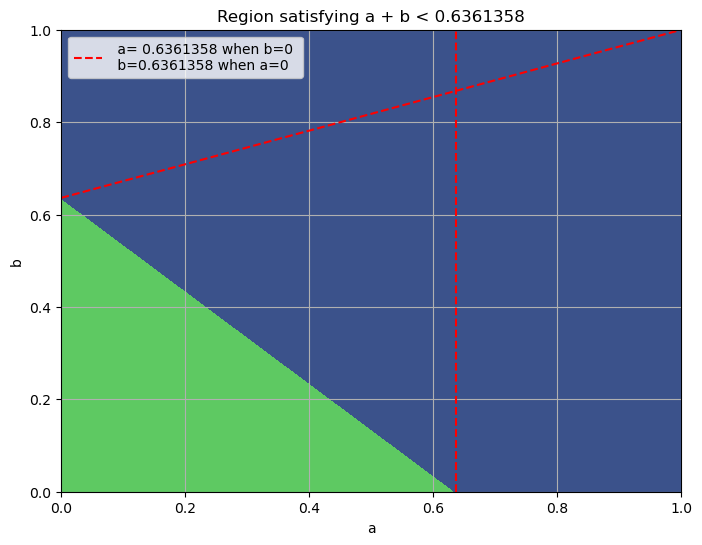

In [21]:
import numpy as np
import matplotlib.pyplot as plt

L= np.array([
    [0.35, 0.0, 0.0, 0.0, 1.0, 0.0],
    [0.16, 0.22, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.37, 0.457, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.389, 2.0, 0.0],
    [0.0, 0.0, 0.0, 0.23, 0.24713584, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.4, 0.7]
])

a_values = np.linspace(0, 1, 100) 
b_values = np.linspace(0, 1, 100) 

A, B = np.meshgrid(a_values, b_values)

sum_ab = A + B

condition = sum_ab < 0.6361358

plt.figure(figsize=(8, 6))
plt.contourf(A, B, condition)
plt.xlabel('a')
plt.ylabel('b')
plt.title("Region satisfying a + b < 0.6361358")

plt.plot([0, 1], [0.6361358, 1], color='red', linestyle='--', label=' a= 0.6361358 when b=0 \n b=0.6361358 when a=0')
plt.plot([0.6361358, 0.6361358], [0, 1], color='red', linestyle='--')

plt.legend()
plt.grid(visible=True)
plt.show()